# Factor Analysis


### Factor Analysis (FA) is an exploratory data analysis method used to search influential underlying factors or latent variables from a set of observed variables. 

### It helps in data interpretations by reducing the number of variables. It extracts maximum common variance from all variables and puts them into a common score.

### Factor analysis is widely utilized in market research, advertising, psychology, finance, and operation research. 

### Market researchers use factor analysis to identify price-sensitive customers, identify brand features that influence consumer choice, and helps in understanding channel selection criteria for the distribution channel.

### We'll cover following:

* Factor Analysis
* Types of Factor Analysis
* Determine Number of Factors
* Adequacy Test
* Interpreting the results

# Factor Analysis

#### Factor analysis is a linear statistical model. It is used to explain the variance among the observed variable and condense a set of the observed variable into the unobserved variable called ___factors___. 

Observed variables are modeled as a linear combination of factors and error terms (Source). Factor or latent variable is associated with multiple observed variables, who have common patterns of responses. Each factor explains a particular amount of variance in the observed variables. It helps in data interpretations by reducing the number of variables.

<img src='fa.JPG'>

Factor analysis is a method for investigating whether a number of variables of interest X1, X2,……., Xl, are linearly related to a smaller number of unobservable factors F1, F2,..……, Fk.

<img src='fa2.JPG'>

## Assumptions
1. There are no outliers in data.
2. Sample size should be greater than the factor.
3. There should not be perfect multicollinearity.
4. There should not be homoscedasticity between the variables.


## Types of Factor Analysis
* Exploratory Factor Analysis: 
        It is the most popular factor analysis approach among social and management researchers. 
        Its basic assumption is that any observed variable is directly associated with any factor.
* Confirmatory Factor Analysis (CFA): 
        Its basic assumption is that each factor is associated with a particular set of observed variables.
        CFA confirms what is expected on the basic.
        
# How does factor analysis work?

#### The primary objective of factor analysis is to reduce the number of observed variables and find unobservable variables. 

#### These unobserved variables help the market researcher to conclude the survey. 

#### This conversion of the observed variables to unobserved variables can be achieved in two steps:

* ___Factor Extraction___: 

___In this step, the number of factors and approach for extraction is selected using variance partitioning methods such as principal components analysis and common factor analysis.___

* ___Factor Rotation___: 

___In this step, rotation tries to convert factors into uncorrelated factors — the main goal of this step to improve the overall interpretability. There are lots of rotation methods that are available such as: Varimax rotation method, Quartimax rotation method, and Promax rotation method.___

# Factor Analysis in python using factor_analyzer package

In [1]:
!pip install factor_analyzer

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Loading Data
## Let's perform factor analysis on BFI (dataset based on personality assessment project), which were collected using a 6 point response scale: 
1. Very Inaccurate
2. Moderately Inaccurate
3. Slightly Inaccurate 
4. Slightly Accurate
5. Moderately Accurate
6. Very Accurate

In [3]:
df= pd.read_csv("bfi.csv")

In [4]:
df.shape

(2800, 29)

In [5]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [6]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [7]:
# Dropping missing values rows
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
Unnamed: 0    2436 non-null int64
A1            2436 non-null float64
A2            2436 non-null float64
A3            2436 non-null float64
A4            2436 non-null float64
A5            2436 non-null float64
C1            2436 non-null float64
C2            2436 non-null float64
C3            2436 non-null float64
C4            2436 non-null float64
C5            2436 non-null float64
E1            2436 non-null float64
E2            2436 non-null float64
E3            2436 non-null float64
E4            2436 non-null float64
E5            2436 non-null float64
N1            2436 non-null float64
N2            2436 non-null float64
N3            2436 non-null float64
N4            2436 non-null float64
N5            2436 non-null float64
O1            2436 non-null float64
O2            2436 non-null int64
O3            2436 non-null float64
O4            2436 non-null float

In [9]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


# Adequacy Test

#### Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. 

#### Factorability means "can we find the factors in the dataset?". 

##### There are two methods to check the factorability or sampling adequacy:

* Bartlett’s Test
* Kaiser-Meyer-Olkin Test

# Bartlett’s test of sphericity 
* This test checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. 
* If the test found statistically insignificant, you should not employ a factor analysis.

In [15]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18210.199553924995, 0.0)

#### In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

# Kaiser-Meyer-Olkin (KMO) Test 

* This test measures the suitability of data for factor analysis. 
* It determines the adequacy for each observed variable and for the complete model. 
* KMO estimates the proportion of variance among all the observed variable. 
* Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
* Value of KMO less than 0.6 is considered inadequate.

In [16]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [17]:
kmo_model

0.8482210116350438

#### The overall KMO for our data is 0.84, which is excellent. This value indicates that you can proceed with your planned factor analysis.

## Choosing the Number of Factors

For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

### Scree Plot:
#### In multivariate statistics, a scree plot is a line plot of the eigenvalues of factors or principal components in an analysis. The scree plot is used to determine the number of factors to retain in an exploratory factor analysis (FA) or principal components to keep in a principal component analysis (PCA).

<img src='scree.JPG'>

In [18]:
# Create factor analysis object and perform factor analysis
#fa = FactorAnalyzer()
fa = FactorAnalyzer(25, rotation="varimax")
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

#### Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).



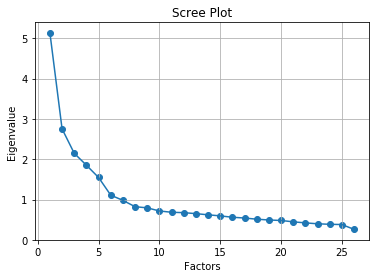

In [19]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#### The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.
#### Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).



# Sci-kit learn implementation 

In [29]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.shape

(150, 4)

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
X, y = iris.data, iris.target
factor = FactorAnalysis(n_components=4, random_state=101).fit(X)

In [32]:
import pandas as pd
#print(type(iris))
print (pd.DataFrame(factor.components_,columns=iris.feature_names))

<class 'sklearn.utils.Bunch'>
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.706989         -0.158005           1.654236           0.70085
1           0.115161          0.159635          -0.044321          -0.01403
2          -0.000000          0.000000           0.000000           0.00000
3          -0.000000          0.000000           0.000000          -0.00000


# eof